# Data Scraper

This notebook will be responsible for scraping all submissions, posts, and user data from Reddit. It is predominantly demonstrative and ultimately will need to be translated into executable Python code that will permit outside parties to run scripts based on the underlying functions here. 

### Starters

First, let's begin importing our relevant libraries and establishing our root project directory.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
import pandas as pd
import numpy as np
import praw
import json
import re

In [3]:
from datetime import datetime as dt, timedelta as td
import requests

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
DATA_FOLDER = '/Users/ssomani/research/heartlab/statins_reddit/data/raw/'
API_LOGIN_FN = '/Users/ssomani/research/heartlab/statins_reddit/data/reddit_auth.json'

In [5]:
date_time = {
    'start' : {
        'year' : 2010,
        'month' : 1,
        'day' : 1
    },
    
    'end' : {
        'year' : 2022,
        'month' : 5,
        'day' : 1
    }
}

start_time = int(dt(date_time['start']['year'], date_time['start']['month'], date_time['start']['day']).timestamp())
end_time = int(dt(date_time['end']['year'], date_time['end']['month'], date_time['end']['day']).timestamp())

In [6]:
with open(API_LOGIN_FN, 'r') as f:
    login_info = json.load(f)
    
# Check to ensure that login_info contains the necessary information.
assert('client_id' in login_info.keys())
assert('client_secret' in login_info.keys())
assert('user_agent' in login_info.keys())

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ssomani/research/heartlab/statins_reddit/data/reddit_auth.json'

### PRAW

In [77]:
reddit = praw.Reddit(**login_info)

In [78]:
tc = reddit.comment('cholesterol')

#### Scrape!

In [151]:
def scrape_posts(subreddit_name, search_word):
    """ Search for all posts matching a search word in a subreddit.
    """
    
    # Create the Subreddit object that matches the subreddit name.
    subreddit = reddit.subreddit(subreddit_name)
    
    # Create empty objects to store post information.
    post_info = pd.DataFrame()
    post_info.index.name = 'id'
    
    posts = {}
    
    # Generate the iterator that will scrape over 
    for post in subreddit.search(search_word, limit=None):
        
        # Save this post as k:v pair.
        posts[post.id] = post
        
        # Store this post's metadata in our dataframe.
        post_info.loc[post.id, 'query'] = search_word
        post_info.loc[post.id, 'subreddit'] = subreddit_name
        post_info.loc[post.id, 'author'] = post.author
        post_info.loc[post.id, 'title'] = post.title
        post_info.loc[post.id, 'body'] = post.selftext
        post_info.loc[post.id, 'number_of_comments'] = post.num_comments
        post_info.loc[post.id, 'upvotes'] = post.score
        post_info.loc[post.id, 'upvote_ratio'] = post.upvote_ratio
        
    return posts, post_info

In [9]:
def scrape_reddit(subreddits, search_words):
    """Scrapes Reddit for posts matching a set of search words in a set of subreddits.
    """

    POST_INFO = ['query', 'subreddit', 'author', 'title', 'body', 'number_of_comments', 'upvotes', 'upvote_ratio']

    all_posts = {}
    all_posts_df = pd.DataFrame(columns=POST_INFO)
    all_posts_df.index.name = 'id'

    for subreddit in subreddits:
        for search_word in search_words:
            print("Now searching r/{0} for {1}".format(subreddit, search_word))

            post_ij, post_df_ij = scrape_posts(subreddit, search_word)

            print("Completed search. Joining!")

            all_posts.update(post_ij)
            all_posts_df = pd.concat([all_posts_df, post_df_ij])

            with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
                all_posts_df.to_excel(writer)

In [175]:
subreddits = ['ketoscience', 'science', 'keto', 'Health', 'conspiracy', 'todayilearned', 'ScientificNutrition', 'askscience', 'Futurology',
    'news', 'PlantBasedDiet', 'nutrition', 'Paleo', 'fasting', 'longevity', 'Supplements', 'Coronavirus', 'COVID19', 'Cholesterol', 'Fitness']
search_words = ['atorvastatin', 'lipitor', 'rosuvastatin', 'crestor', 'pitavastatin', 'livalo', 'zypitamag', 'simvastatin', 'zocor', 'pravastatin', 
                'pravachol', 'lovastatin', 'altoprev', 'fluvastatin', 'lescol']

scrape_reddit(subreddits, search_words)

Now searching r/ketoscience for atorvastatin
Completed search. Joining!
Now searching r/ketoscience for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for pitavastatin
Completed search. Joining!


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Now searching r/ketoscience for livalo
Completed search. Joining!
Now searching r/ketoscience for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ketoscience for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for zypitamag
Completed search. Joining!


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Now searching r/science for simvastatin
Completed search. Joining!
Now searching r/science for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/science for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/keto for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Health for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/conspiracy for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/todayilearned for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/ScientificNutrition for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/askscience for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Futurology for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/news for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/PlantBasedDiet for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/nutrition for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Paleo for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/fasting for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/longevity for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Supplements for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Coronavirus for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/COVID19 for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Cholesterol for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for atorvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for lipitor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for rosuvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for crestor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for pitavastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for livalo


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for zypitamag


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for simvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for zocor


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for pravastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for pravachol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for lovastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for altoprev


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for fluvastatin


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!
Now searching r/Fitness for lescol


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


Completed search. Joining!


/var/folders/y1/2907rcw50gq_rm33vwpb806r0000gn/T/ipykernel_71372/533152681.py:22: FutureWarning: Use of **kwargs is deprecated, use engine_kwargs instead.
  with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:


## PushShift.io?

Let's try to use PushShift.io as a better way of tabulating this data instead.

In [4]:
from psaw import PushshiftAPI
api = PushshiftAPI()

In [5]:
POST_DF_MAPPING = {
    'id' : 'id',
    'author' : 'author',
    'title' : 'title',
    'date' : 'created_utc',
    'body' : 'selftext',
    'n_comments' : 'num_comments',
    'upvotes' : 'score',
}

COMM_DF_MAPPING = {
    'id' : 'id',
    'author' : 'author',
    'title' : 'title',    
    'body' : 'body',
    'date' : 'created_utc',
    'link_id' : 'link_id',
    'parent_id' : 'parent_id',
    'upvotes' : 'score'
}

PSAW_MAPPINGS = {
    'post' : POST_DF_MAPPING,
    'comment' : COMM_DF_MAPPING
}

In [6]:
def api_result_conversion(res, type_of_res):
    """
    Convert the API result from PSAW into a pandas Series.    
    """
    
    mapping = PSAW_MAPPINGS[type_of_res]
    
    out = []
    
    for col, col_map in mapping.items():
        try:
            out.append(getattr(res, col_map))
        except:
            out.append('')
        
    return out

In [61]:
def scrape_reddit_posts(subreddits, search_words, save_name):
    """Scrapes Reddit for posts matching a set of search words in a set of subreddits.
    """

    posts = []
    cols = ['subreddit', 'query']
    cols.extend(POST_DF_MAPPING.keys())

    for subreddit in subreddits:
        for search_word in search_words:
            print("Now searching r/{0} for {1}".format(subreddit, search_word))
            
            # Generate the iterator that will scrape over 
            for post in api.search_submissions(q=search_word, subreddit=subreddit):
                
                post_ext = [subreddit, search_word]
                post_ext.extend(api_result_conversion(post, 'post'))
                
                posts.append(post_ext)

            print("Completed search. Total {0} entries!".format(len(posts)))
                             
    post_df = pd.DataFrame(posts, columns=cols)
    post_df = post_df.drop_duplicates(subset='id')
    post_df.set_index('id')
    
    with pd.ExcelWriter(DATA_FOLDER + save_name, engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
        post_df.to_excel(writer)
    
    return post_df

def scrape_reddit_comments(subreddits, search_words, save_name):
    """Scrapes Reddit for posts matching a set of search words in a set of subreddits.
    """

    comms = []
    cols = ['subreddit', 'query']
    cols.extend(COMM_DF_MAPPING.keys())

    for subreddit in subreddits:
        for search_word in search_words:
            print("Now searching r/{0} for {1}".format(subreddit, search_word))
            
            # Generate the iterator that will scrape over 
            for comm in api.search_comments(q=search_word, subreddit=subreddit):
                
                comm_ext = [subreddit, search_word]
                comm_ext.extend(api_result_conversion(comm, 'comment'))
                
                comms.append(comm_ext)

            print("Completed search. Total {0} entries!".format(len(comms)))
                             
    comm_df = pd.DataFrame(comms, columns=cols)
    comm_df = comm_df.drop_duplicates(subset='id')
    comm_df.set_index('id')
    
    with pd.ExcelWriter(DATA_FOLDER + save_name, engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
        comm_df.to_excel(writer)
        
    return comm_df

In [8]:
def scrape_reddit_comments_in_post(posts, save_name):
    """Scrapes Reddit for posts matddching a set of search words in a set of subreddits.
    """
    
    cols = []
    cols.extend(COMM_DF_MAPPING.keys())
    
    comments = []
    post_ids = posts.index.drop_duplicates()
    
    for post_id in post_ids:
        print("Now searching post <{0}>".format(post_id))

        for comment in api.search_comments(link_id=post_id):
                
            comment_row = api_result_conversion(comment, 'comment')
            comments.append(comment_row)
            
        print("Completed search. Total {0} entries!".format(len(comments)))

    comm_df = pd.DataFrame(comments, columns=cols)
    comm_df.set_index('id')
    
    with pd.ExcelWriter(DATA_FOLDER + save_name, engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
        comm_df.to_excel(writer)


In [44]:
scrape_reddit_comments_in_post(posts, 'comments_from_posts_20220706.xlsx')

Now searching post <tqf3q1>
Completed search. Total 0 entries!
Now searching post <tqctzk>
Completed search. Total 0 entries!
Now searching post <t5j2iq>
Completed search. Total 0 entries!
Now searching post <sdiu8l>
Completed search. Total 0 entries!
Now searching post <rorrcc>
Completed search. Total 0 entries!
Now searching post <rnqlnj>
Completed search. Total 0 entries!
Now searching post <rc7ati>
Completed search. Total 0 entries!
Now searching post <q20bog>
Completed search. Total 47 entries!
Now searching post <p1w57r>
Completed search. Total 49 entries!
Now searching post <p1qo5n>
Completed search. Total 49 entries!
Now searching post <o2rimg>
Completed search. Total 52 entries!
Now searching post <nuyvd3>
Completed search. Total 56 entries!
Now searching post <njgthz>
Completed search. Total 64 entries!
Now searching post <m0jdr3>
Completed search. Total 90 entries!
Now searching post <lwzj79>
Completed search. Total 97 entries!
Now searching post <kv4q31>
Completed search. T

KeyboardInterrupt: 

In [14]:
subreddits = ['ketoscience', 'science', 'keto', 'Health', 'conspiracy', 'todayilearned', 'ScientificNutrition', 'askscience',
    'news', 'PlantBasedDiet', 'nutrition', 'Paleo', 'longevity', 'Supplements', 'COVID19', 'Cholesterol', 'skeptic', 'diabetes', 'stopusingstatins']
search_words = ['statin', 'atorvastatin', 'lipitor', 'rosuvastatin', 'crestor', 'pitavastatin', 'livalo', 'zypitamag', 'simvastatin', 'zocor', 'pravastatin', 
                'pravachol', 'lovastatin', 'altoprev', 'fluvastatin', 'lescol']

comms = scrape_reddit_comments(subreddits, search_words, 'comments_20220712.xlsx')
posts = scrape_reddit_posts(subreddits, search_words, 'posts_20220712.xlsx')

In [24]:
comms = pd.read_excel(DATA_FOLDER + 'comments_20220712.xlsx', index_col='id')
posts = pd.read_excel(DATA_FOLDER + 'posts_20220712.xlsx', index_col='id')

posts['date'] = posts['date'].apply(lambda x: dt.fromtimestamp(x))
comms['date'] = comms['date'].apply(lambda x: dt.fromtimestamp(x))

In [25]:
search_words_regex = re.compile("|".join(search_words))

matching_rows = posts['body'].map(lambda x: True if search_words_regex.search(str(x)) else False) + \
    posts['title'].map(lambda x: True if search_words_regex.search(x) else False)

posts = posts.loc[matching_rows, :].sort_values(by='upvotes')

In [26]:
posts['content'] = posts['title'] + '. ' + posts['body']
comms['content'] = comms['body']

posts['type'] = 'post'
comms['type'] = 'comment'

In [30]:
cols_to_keep = ['query', 'subreddit', 'type', 'author', 'content', 'date', 'upvotes']
pc = pd.concat((posts[cols_to_keep], comms[cols_to_keep]))

In [64]:
len_text = pc['content'].apply(lambda x : len(str(x).split()))

<AxesSubplot:xlabel='content', ylabel='Count'>

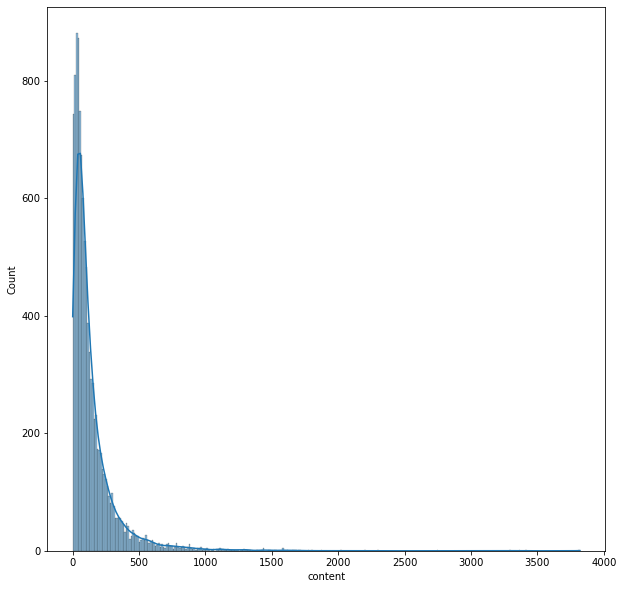

In [74]:
# Visualize distribution of words

plt.figure(figsize=(10, 10))
sns.histplot(len_text, kde=True)

In [76]:
# Only keep posts or comments with more than 5 words.
pc = pc.loc[len_text > 5, :]

In [79]:
pc.columns = ['subreddit', 'query', 'type', 'author', 'content', 'date', 'upvotes']

In [80]:
with pd.ExcelWriter(DATA_FOLDER + 'posts_comms_20220712.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
    pc.to_excel(writer)

## PRAW

Load login information for PRAW to begin scraping :) 

## Failed Experiments

In [156]:
class PushShift:
    """
    
    The PushShift iterator combs through data available via pushshift.io by effectively \
    paginating the search query.
    
    """
    
    def __init__(self, subreddit, search_phrase, start_time, end_time):
        """Initialize our PushShift iterator.
        
        ARGS
        ----
        @TODO
        
        """
        
        self.sr = subreddit
        self.q = search_phrase
        self.st = start_time
        self.et = end_time
    
    def __iter__(self):
        self.time = self.et
        return self
    
    def __next__(self):
        count = 0
        
        if self.time > self.st:
            
            p = {
                'q' : self.q,
                'subreddit' : self.sr,
                'before' : self.time,
            }
            
            url = BASE_POSTS_URL + "?q={0}&subreddit={1}&before={2}".format(self.q, self.sr, self.time)
            
            # posts = requests.get(base_url, params=p).json()['data']
            posts = requests.get(base_url)
            posts = posts.json()
            posts = posts['data']
            
            import pdb; pdb.set_trace(); 
            
            self.time = posts[-1]['created_utc']
            posts = self.convert_to_output(posts)
            
        return posts
            
    def convert_to_output(self, posts):
        """ Convert the GET query into a Pandas dataframe that can be concatenated by the \
            parent function calling the iterator.
        """
        
        post_info = pd.DataFrame()
        post_info.index.name = 'id'

        for post in posts:
        
            post_info.loc[post.id, 'query'] = self.q
            post_info.loc[post.id, 'subreddit'] = self.sr
            post_info.loc[post.id, 'author'] = post['author']
            post_info.loc[post.id, 'title'] = post['title']
            post_info.loc[post.id, 'body'] = post['selftext']
            post_info.loc[post.id, 'number_of_comments'] = post['num_comments']
            post_info.loc[post.id, 'upvotes'] = post['score']
            post_info.loc[post.id, 'upvote_ratio'] = post['upvote_ratio']
            
        return post_info

In [121]:
def scrape_posts(subreddit_name, search_word):
    """ Search for all posts matching a search word in a subreddit.
    """
        
    # Create empty objects to store post information.
    POST_COLS = ['query', 'subreddit', 'author', 'title', 'body', 'number_of_comments', 'upvotes', 'upvote_ratio']
    
    post_info = pd.DataFrame(columns=POST_COLS)
    post_info.index.name = 'id'
    
    posts = {}
    
    # Generate the iterator that will scrape over 
    for post in PushShift(subreddit_name, search_word, start_time, end_time):

        post_info = pd.concat([post_info, post])
        
    return post_info

In [46]:
def scrape_reddit(subreddits, search_words):
    """Scrapes Reddit for posts matching a set of search words in a set of subreddits.
    """

    POST_INFO = ['query', 'subreddit', 'author', 'title', 'body', 'number_of_comments', 'upvotes', 'upvote_ratio']

    all_posts_df = pd.DataFrame(columns=POST_INFO)
    all_posts_df.index.name = 'id'

    for subreddit in subreddits:
        for search_word in search_words:
            print("Now searching r/{0} for {1}".format(subreddit, search_word))

            post_df_ij = scrape_posts(subreddit, search_word)

            print("Completed search. Joining!")
            all_posts_df = pd.concat([all_posts_df, post_df_ij])

            with pd.ExcelWriter(DATA_FOLDER + 'scraped_posts_full.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
                all_posts_df.to_excel(writer)

In [ ]:
def scrape_reddit_cmnts(subreddits, search_words):
    """Scrapes Reddit for posts matching a set of search words in a set of subreddits.
    """

    POST_INFO = ['query', 'subreddit', 'author', 'body', 'link_id', 'parent_id', 'upvotes']

    all_posts = {}
    all_posts_df = pd.DataFrame(columns=POST_INFO)
    all_posts_df.index.name = 'id'

    for subreddit in subreddits:
        for search_word in search_words:
            print("Now searching r/{0} for {1}".format(subreddit, search_word))

            # Create empty objects to store post information.
            post_info = pd.DataFrame()
            post_info.index.name = 'id'

            posts = {}

            # Generate the iterator that will scrape over 
            for post in api.search_comments(q=search_word, subreddit=subreddit):

                # Save this post as k:v pair.
                posts[post.id] = post

                # Store this post's metadata in our dataframe.
                post_info.loc[post.id, 'query'] = search_word
                post_info.loc[post.id, 'subreddit'] = subreddit
                post_info.loc[post.id, 'author'] = post.author

                try:
                    post_info.loc[post.id, 'body'] = post.body
                except:
                    pass

                post_info.loc[post.id, 'link_id'] = post.link_id
                post_info.loc[post.id, 'parent_id'] = post.parent_id
                post_info.loc[post.id, 'upvotes'] = post.score
                # post_info.loc[post.id, 'upvote_ratio'] = post.upvote_ratio

            print("Completed search. Found {0} entries. Joining!".format(post_info.shape[0]))

            all_posts.update(posts)
            all_posts_df = pd.concat([all_posts_df, post_info])

            with pd.ExcelWriter(DATA_FOLDER + 'scraped_comments_full_psaw.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
                all_posts_df.to_excel(writer)

In [313]:
subreddits = ['ketoscience', 'science', 'keto', 'Health', 'conspiracy', 'todayilearned', 'ScientificNutrition', 'askscience', 'Futurology',
    'news', 'PlantBasedDiet', 'nutrition', 'Paleo', 'fasting', 'longevity', 'Supplements', 'Coronavirus', 'COVID19', 'Cholesterol', 'Fitness']
search_words = ['statin', 'atorvastatin', 'lipitor', 'rosuvastatin', 'crestor', 'pitavastatin', 'livalo', 'zypitamag', 'simvastatin', 'zocor', 'pravastatin', 
                'pravachol', 'lovastatin', 'altoprev', 'fluvastatin', 'lescol']

scrape_reddit_cmnts(subreddits, search_words)

Now searching r/ketoscience for statin
Completed search. Found 464 entries. Joining!
Now searching r/ketoscience for atorvastatin
Completed search. Found 12 entries. Joining!
Now searching r/ketoscience for lipitor
Completed search. Found 23 entries. Joining!
Now searching r/ketoscience for rosuvastatin
Completed search. Found 11 entries. Joining!
Now searching r/ketoscience for crestor
Completed search. Found 15 entries. Joining!
Now searching r/ketoscience for pitavastatin
Completed search. Found 2 entries. Joining!
Now searching r/ketoscience for livalo
Completed search. Found 0 entries. Joining!
Now searching r/ketoscience for zypitamag
Completed search. Found 0 entries. Joining!
Now searching r/ketoscience for simvastatin
Completed search. Found 8 entries. Joining!
Now searching r/ketoscience for zocor
Completed search. Found 0 entries. Joining!
Now searching r/ketoscience for pravastatin
Completed search. Found 4 entries. Joining!
Now searching r/ketoscience for pravachol
Complet

In [303]:
def scrape_author_posts(authors):
    """Scrapes Reddit for posts matching a set of search words in a set of subreddits.
    """

    POST_INFO = ['query', 'subreddit', 'author', 'title', 'body', 'number_of_comments', 'upvotes', 'upvote_ratio']

    all_posts = {}
    all_posts_df = pd.DataFrame(columns=POST_INFO)
    all_posts_df.index.name = 'id'

    for author in authors:
        print("Now searching r/{0} for {1}".format(subreddit, search_word))

        # Create empty objects to store post information.
        post_info = pd.DataFrame()
        post_info.index.name = 'id'

        posts = {}

        # Generate the iterator that will scrape over 
        for post in api.search_comments(q=search_word, subreddit=subreddit):

            # Save this post as k:v pair.
            posts[post.id] = post

            # Store this post's metadata in our dataframe.
            post_info.loc[post.id, 'query'] = search_word
            post_info.loc[post.id, 'subreddit'] = subreddit
            post_info.loc[post.id, 'author'] = post.author

            try:
                post_info.loc[post.id, 'body'] = post.body
            except:
                pass

            post_info.loc[post.id, 'link_id'] = post.link_id
            post_info.loc[post.id, 'parent_id'] = post.parent_id
            post_info.loc[post.id, 'upvotes'] = post.score
            # post_info.loc[post.id, 'upvote_ratio'] = post.upvote_ratio

            print("Completed search. Found {0} entries. Joining!".format(post_info.shape[0]))

            all_posts.update(posts)
            all_posts_df = pd.concat([all_posts_df, post_info])

            with pd.ExcelWriter(DATA_FOLDER + 'scraped_comments_full_psaw.xlsx', engine='xlsxwriter', options={'strings_to_urls': False}) as writer:
                all_posts_df.to_excel(writer)

Unnamed: 0                                              icnalcx
query                                                    statin
subreddit                                           ketoscience
author                                            dirtyloophole
body          I completely agree that there is a lot of BS Y...
parent_id                                            t1_i9t0ktq
upvotes                                                       1
Name: t3_rnqlnj, dtype: object